# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from ratelimit import limits
from scipy.stats import linregress
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [30]:
#Set up URL

url = "http://api.openweathermap.org/data/2.5/weather?"

#Create dictionary to store data from API calls (example call shown at https://openweathermap.org/current#current_JSON)
weather_dict= {"City": [],"Country": [], "Latitude": [],
               "Longitude": [],"Max Temperature": [], "Cloudiness": [],
               "Wind Speed": [],"Humidity": [],"Date": []}
            
#Create variables to assist in limiting call numbers
call_num = 1
set_num = 1

#Randomly select 500 cities from the list:
rand_cities = random.choices(cities, k=560)


#For loop to iterate through cities and make API calls

for i, city in enumerate(rand_cities):
    query_url = url+"appid="+weather_api_key+"&q="+cities[i]
    city = requests.get(query_url).json()
    
#Try statement to store complete data into dictionary
    try:
        weather_dict["City"].append(city["name"])
        weather_dict["Country"].append(city["sys"]["country"])
        weather_dict["Latitude"].append(city["coord"]["lat"])
        weather_dict['Longitude'].append(city['coord']['lon'])
        weather_dict['Max Temperature'].append(city["main"]["temp_max"])
        weather_dict['Cloudiness'].append(city["clouds"]["all"])
        weather_dict['Wind Speed'].append(city['wind']['speed'])
        weather_dict['Humidity'].append(city['main']['humidity'])
        weather_dict['Date'].append(city['dt'])
        city_name=city["name"]
        
        #Print statement with city number and city name for each city     
        print(f"Retrieving data for city {call_num} in set {set_num}. City: {city_name}")            
     
       #iterate on call and set counters
        if call_num == 50:
            call_num = 1
            set_num += 1
            time.sleep(60)
        else:
            call_num +=1
    
    except: 
        print("Missing data for this city, skipping to next")
        pass
    
print("Data collection complete!")


Retrieving data for city 1 in set 1. City: Lebu
Retrieving data for city 2 in set 1. City: Laguna
Retrieving data for city 3 in set 1. City: Goderich
Retrieving data for city 4 in set 1. City: Maniitsoq
Retrieving data for city 5 in set 1. City: Klaksvík
Retrieving data for city 6 in set 1. City: Broken Hill
Retrieving data for city 7 in set 1. City: Jamestown
Retrieving data for city 8 in set 1. City: Ixtapa
Retrieving data for city 9 in set 1. City: Rawson
Retrieving data for city 10 in set 1. City: Nuuk
Retrieving data for city 11 in set 1. City: Safford
Retrieving data for city 12 in set 1. City: Busselton
Retrieving data for city 13 in set 1. City: Grindavik
Retrieving data for city 14 in set 1. City: Butaritari
Retrieving data for city 15 in set 1. City: La Ronge
Retrieving data for city 16 in set 1. City: East London
Retrieving data for city 17 in set 1. City: Lázaro Cárdenas
Retrieving data for city 18 in set 1. City: Atuona
Retrieving data for city 19 in set 1. City: Lagoa
Ret

Retrieving data for city 47 in set 3. City: Peterhead
Retrieving data for city 48 in set 3. City: São Gabriel da Cachoeira
Retrieving data for city 49 in set 3. City: Rocky Mountain House
Retrieving data for city 50 in set 3. City: ‘Ewa Beach
Retrieving data for city 1 in set 4. City: Hasaki
Retrieving data for city 2 in set 4. City: Fukuechō
Retrieving data for city 3 in set 4. City: Makakilo City
Retrieving data for city 4 in set 4. City: Longyearbyen
Retrieving data for city 5 in set 4. City: Kouango
Retrieving data for city 6 in set 4. City: Aykhal
Retrieving data for city 7 in set 4. City: Lorengau
Retrieving data for city 8 in set 4. City: Maroantsetra
Retrieving data for city 9 in set 4. City: Yulara
Retrieving data for city 10 in set 4. City: Beloha
Retrieving data for city 11 in set 4. City: Heihe
Retrieving data for city 12 in set 4. City: Shelopugino
Retrieving data for city 13 in set 4. City: Ponta do Sol
Retrieving data for city 14 in set 4. City: Lüderitz
Retrieving data 

Retrieving data for city 36 in set 6. City: Saint-Joseph
Retrieving data for city 37 in set 6. City: Kloulklubed
Retrieving data for city 38 in set 6. City: Turukhansk
Retrieving data for city 39 in set 6. City: Krasnosel'kup
Retrieving data for city 40 in set 6. City: Souillac
Retrieving data for city 41 in set 6. City: Tromsø
Retrieving data for city 42 in set 6. City: Changqing
Retrieving data for city 43 in set 6. City: Zholymbet
Retrieving data for city 44 in set 6. City: Andros Town
Retrieving data for city 45 in set 6. City: Mehamn
Retrieving data for city 46 in set 6. City: Ponta Delgada
Retrieving data for city 47 in set 6. City: Cidreira
Retrieving data for city 48 in set 6. City: Ayan
Missing data for this city, skipping to next
Retrieving data for city 49 in set 6. City: Umluj
Retrieving data for city 50 in set 6. City: Martinsburg
Retrieving data for city 1 in set 7. City: Rocha
Missing data for this city, skipping to next
Retrieving data for city 2 in set 7. City: Balkhas

Retrieving data for city 28 in set 9. City: Phan Thiet
Retrieving data for city 29 in set 9. City: Portland
Retrieving data for city 30 in set 9. City: Madang
Retrieving data for city 31 in set 9. City: Constitución
Retrieving data for city 32 in set 9. City: Whitehorse
Retrieving data for city 33 in set 9. City: Pāvugada
Retrieving data for city 34 in set 9. City: Pacific Grove
Retrieving data for city 35 in set 9. City: Muswellbrook
Retrieving data for city 36 in set 9. City: Novoasbest
Retrieving data for city 37 in set 9. City: Miranda
Retrieving data for city 38 in set 9. City: Martinsville
Retrieving data for city 39 in set 9. City: Gladstone
Retrieving data for city 40 in set 9. City: Uzhhorod
Retrieving data for city 41 in set 9. City: Sioux Lookout
Retrieving data for city 42 in set 9. City: Ibrā’
Missing data for this city, skipping to next
Retrieving data for city 43 in set 9. City: Makkah al Mukarramah
Retrieving data for city 44 in set 9. City: Kamiiso
Retrieving data for 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
weather_df=pd.DataFrame(weather_dict)

weather_df.to_csv(output_data_file)
weather_df


,City,Country,Latitude,Longitude,Max Temperature,Cloudiness,Wind Speed,Humidity,Date
0,Lebu,CL,-37.6167,-73.6500,291.41,34,4.77,77,1643832436
1,Laguna,US,38.4210,-121.4238,289.06,0,5.36,29,1643832756
2,Goderich,CA,43.7501,-81.7165,272.61,100,7.93,96,1643832357
3,Maniitsoq,GL,65.4167,-52.9000,256.35,100,8.12,82,1643832954
4,Klaksvík,FO,62.2266,-6.5890,278.66,100,3.43,82,1643832432
...,...,...,...,...,...,...,...,...,...
502,Wajima,JP,37.4000,136.9000,277.86,100,9.64,65,1643833685
503,Akdepe,TM,42.0551,59.3788,274.20,1,4.32,81,1643833685
504,Kruisfontein,ZA,-34.0033,24.7314,294.20,100,3.67,91,1643833686
505,Okha,RU,53.5739,142.9478,255.91,99,11.64,91,1643833686


In [36]:
#Determine if humidity outliers need to be removed

try:
    weather_df.loc(weather_df[weather_df['Humidity']]<=100)
except:
    print("No rows with Humidity over 100")

No rows with Humidity over 100


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
#Create summary chart
weather_df.describe()

,Latitude,Longitude,Max Temperature,Cloudiness,Wind Speed,Humidity,Date
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,5.070000e+02
mean,21.253803,18.081841,282.552426,62.108481,3.786469,73.230769,1.643833e+09
std,33.208477,92.291569,18.250733,40.431639,2.769875,22.300499,2.958890e+02
min,-54.800000,-175.200000,234.310000,0.000000,0.000000,7.000000,1.643832e+09
25%,-3.908550,-65.407400,268.875000,20.000000,1.790000,61.000000,1.643833e+09
50%,25.286700,23.371600,288.930000,75.000000,3.090000,78.000000,1.643833e+09
75%,51.106600,102.382750,297.995000,100.000000,5.140000,91.000000,1.643833e+09
max,78.218600,179.316700,313.680000,100.000000,16.980000,100.000000,1.643834e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This shows a possible negative, curvilinear relationship between Latitude and Temperature


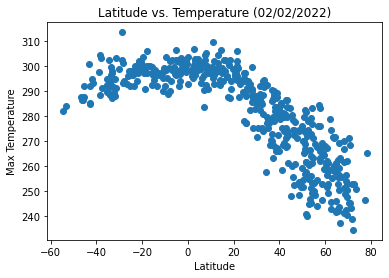

In [46]:
plt.scatter(weather_df['Latitude'], weather_df['Max Temperature'])
plt.title("Latitude vs. Temperature (02/02/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig('output_data/scatter1')
print('This shows a possible negative, curvilinear relationship between Latitude and Temperature')

## Latitude vs. Humidity Plot

This plot shows how Latitude might affect humidity. At first glance, there doesn't appear to be a relationship


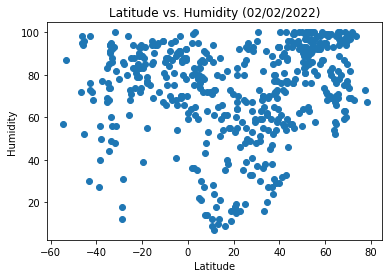

In [47]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])
plt.title("Latitude vs. Humidity (02/02/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('output_data/scatter2')
print("This plot shows how Latitude might affect Humidity. At first glance, there doesn't appear to be a relationship")

## Latitude vs. Cloudiness Plot

This plot shows how Latitude might affect Cloudiness. At first glance, there doesn't appear to be a relationship


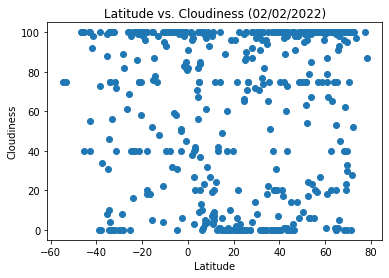

In [48]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'])
plt.title("Latitude vs. Cloudiness (02/02/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('output_data/scatter3')
print("This plot shows how Latitude might affect Cloudiness. At first glance, there doesn't appear to be a relationship")

## Latitude vs. Wind Speed Plot

This shows a possible positive, linear relationship between Latitude and Windspeed


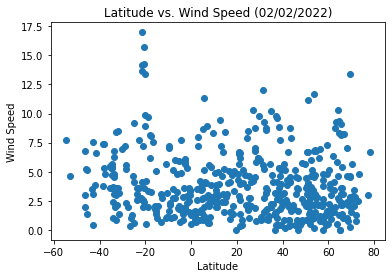

In [49]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'])
plt.title("Latitude vs. Wind Speed (02/02/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('output_data/scatter4')
print('This shows a possible positive, linear relationship between Latitude and Windspeed')

## Linear Regression

In [51]:
#Create new dataframes for both hemispheres

north_df = weather_df.loc[weather_df['Latitude']>=0]
south_df = weather_df.loc[weather_df['Latitude']<=0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the p value is 5.9440786481841024e-114 and the r value is -0.8734794062637535


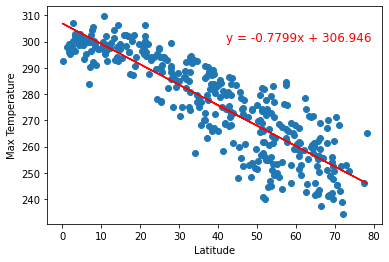

In [68]:
#Generate Regression and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Max Temperature'])
regress_values = north_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(north_df['Latitude'],north_df['Max Temperature'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(42,300),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig('output_data/reg1')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the p value is 2.1870029992883318e-11 and the r value is 0.5162703086368006


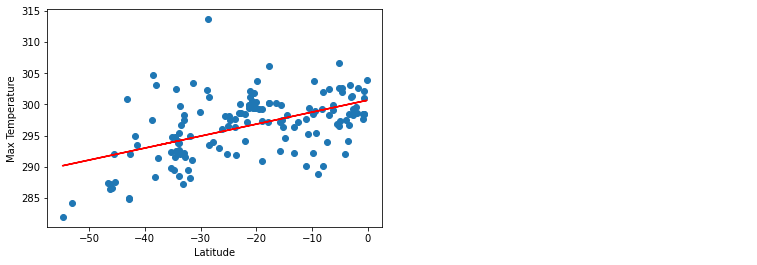

In [69]:
#Generate Regression and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Max Temperature'])
regress_values = south_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(south_df['Latitude'],south_df['Max Temperature'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(42,300),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig('output_data/reg2')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the p value is 6.534992016060016e-19 and the r value is 0.44501287160299335


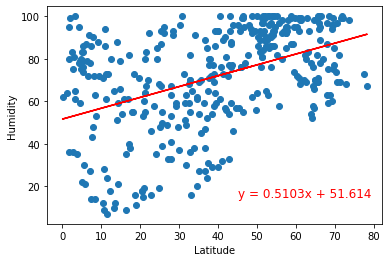

In [70]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Humidity'])
regress_values = north_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(north_df['Latitude'],north_df['Humidity'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(45,15),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('output_data/reg3')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the p value is 0.028016850620969865 and the r value is 0.1812533071658991


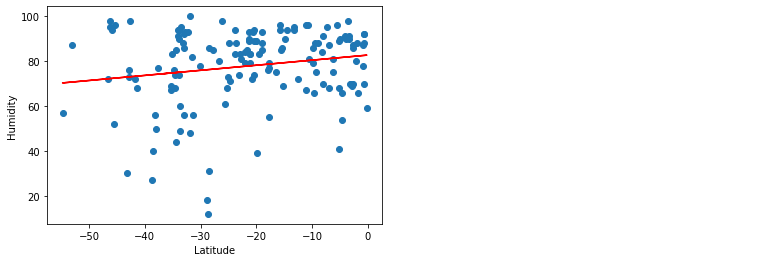

In [71]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Humidity'])
regress_values = south_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(south_df['Latitude'],south_df['Humidity'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(45,15),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('output_data/reg4')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the p value is 1.1116850658819207e-07 and the r value is 0.2752625086621733


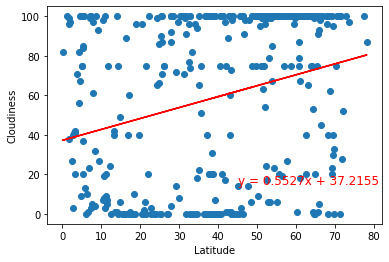

In [72]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Cloudiness'])
regress_values = north_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(north_df['Latitude'],north_df['Cloudiness'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(45,15),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('output_data/reg5')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the p value is 0.09685274234622605 and the r value is 0.13746242464422037


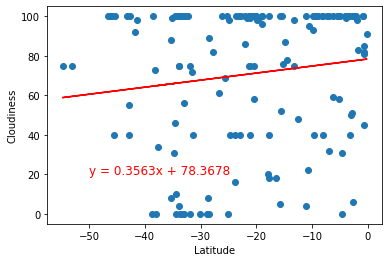

In [73]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Cloudiness'])
regress_values = south_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(south_df['Latitude'],south_df['Cloudiness'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(-50,20),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('output_data/reg6')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the p value is 0.9109484907620626 and the r value is -0.005915123844000994


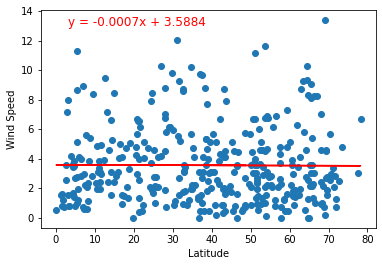

In [74]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Wind Speed'])
regress_values = north_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(north_df['Latitude'],north_df['Wind Speed'])
plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(3,13),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('output_data/reg7')
print(f'the p value is {pvalue} and the r value is {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the p value is 0.07784588759222834 and the r value is -0.14590274666306347


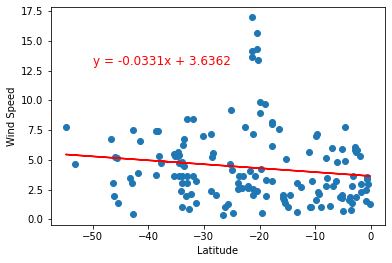

In [75]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Wind Speed'])
regress_values = south_df['Latitude']*slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

plt.scatter(south_df['Latitude'],south_df['Wind Speed'])
plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,xy=(-50,13),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('output_data/reg8')
print(f'the p value is {pvalue} and the r value is {rvalue}')